In [1]:
%load_ext autoreload
%autoreload 2
from compart.marks import Ellipse, Rectangle
from compart.plots import plot_line, plot_vline, plot_hline

import matplotlib.pyplot as plt
import numpy as np

from pathlib import Path

SAVEDIR = Path("../examples").resolve()

assert SAVEDIR.exists() and SAVEDIR.is_dir()

In [2]:
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['figure.constrained_layout.use'] = True

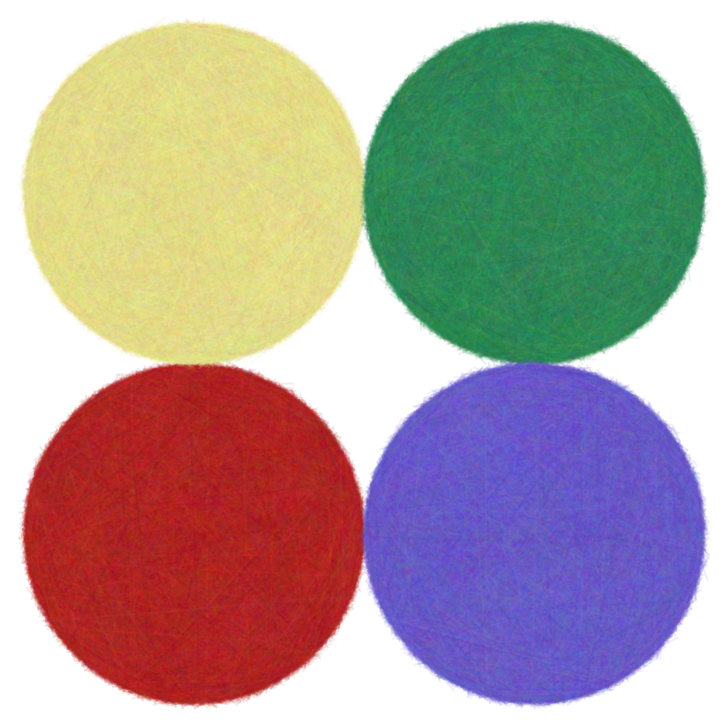

In [3]:
n = 30_000

fig, ax = plt.subplots(figsize=(10, 10))

r = 0.97
for (center, color) in [((-1, -1), 'firebrick'), ((-1, 1), 'khaki'), ((1, 1), 'seagreen'), ((1, -1), 'slateblue')]:
    circ = Ellipse(center=center, width=r, height=r)
    circ.plot(ax=ax, color=color, n=n, lw=2, alpha=0.1, fuzz=20)
ax.set_xlim(-2.1, 2.1)
ax.set_ylim(-2.1, 2.1)
ax.set_axis_off()
fig.savefig(SAVEDIR / 'circles.png')

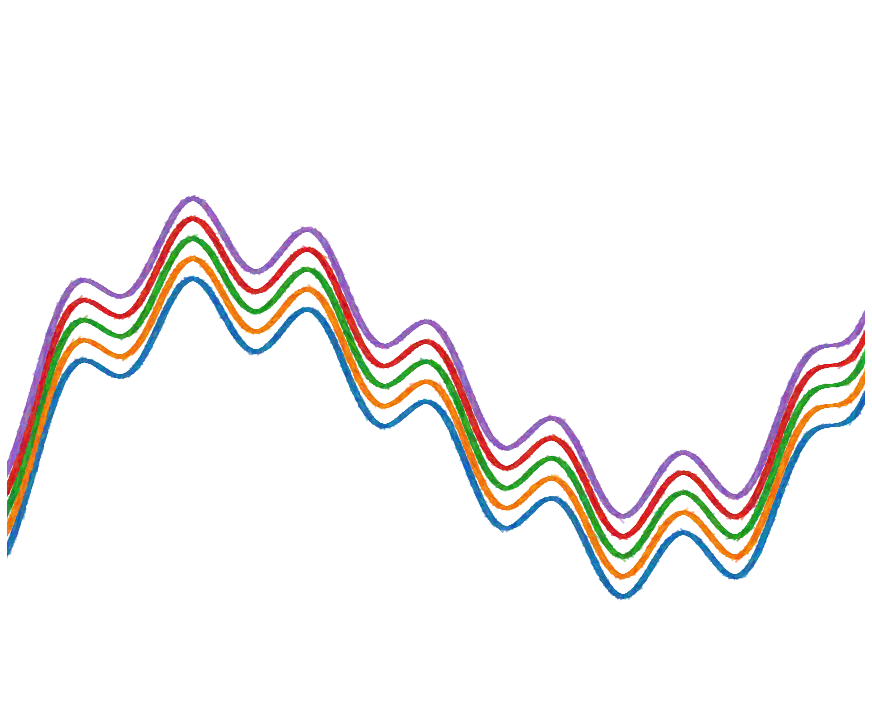

In [4]:
fig, ax = plt.subplots(figsize=(12, 10))

t = np.linspace(-1.1, 1.1, 200)
n = 5

f = lambda t: 0.5 * np.cos(20 * t) + 5 * (t - 1) * t * (t + 1)
miny, maxy = 0, 0
for idx in range(n):
    y = f(t) + 0.3 * idx
    miny = min(miny, y.min())
    maxy = max(maxy, y.max())
    plot_line(ax, t, y, color=f'C{idx}', alpha=0.5, n=2_000, width=0.005, lw=2, fuzz=300)
ax.set_xlim(t.min(), t.max())
ax.set_ylim(1.8 * miny, 1.8 * maxy)
ax.set_axis_off()
fig.savefig(SAVEDIR / 'squiggles.png')

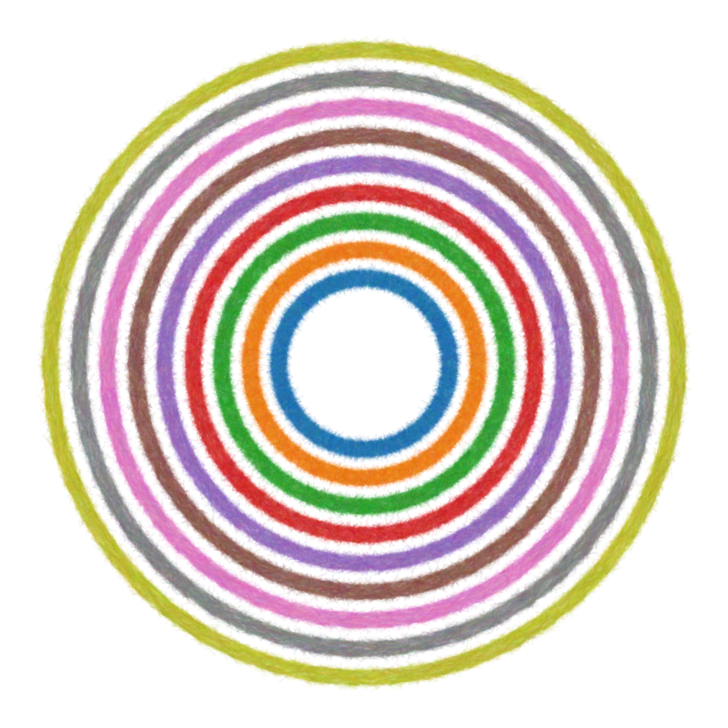

In [5]:
fig, ax = plt.subplots(figsize=(10, 10))

t = np.linspace(-np.pi, np.pi, 50)
n = 9
r = 0.2
for idx in range(n):
    plot_line(ax, r * (3 + idx) * np.cos(t), r * (3 + idx) * np.sin(t), color=f'C{idx}', width=0.1, lw=2, n=1_000, alpha=0.07)
    
lim = r * (n + 3) + 0.1
ax.set_xlim(-lim, lim)
ax.set_ylim(-lim, lim)
ax.set_axis_off()
fig.savefig(SAVEDIR / 'rings.png')

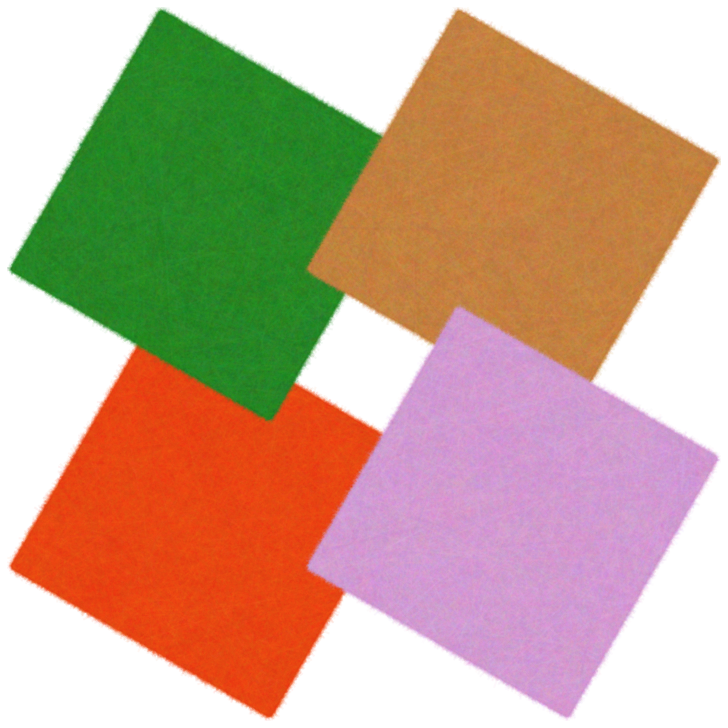

In [6]:
n = 120_000

fig, ax = plt.subplots(figsize=(10, 10))

for (center, color) in [((-1, -1), 'orangered'), ((-1, 1), 'forestgreen'), ((1, 1), 'peru'), ((1, -1), 'plum')]:
    rect = Rectangle(center=center, width=2, height=2)
    rect.plot(ax=ax, color=color, n=n, fuzz=5, alpha=0.05, rot=np.pi / 6)
ax.set_xlim(-2.4, 2.4)
ax.set_ylim(-2.4, 2.4)
ax.set_axis_off()
fig.savefig(SAVEDIR / 'twist_squares.png')

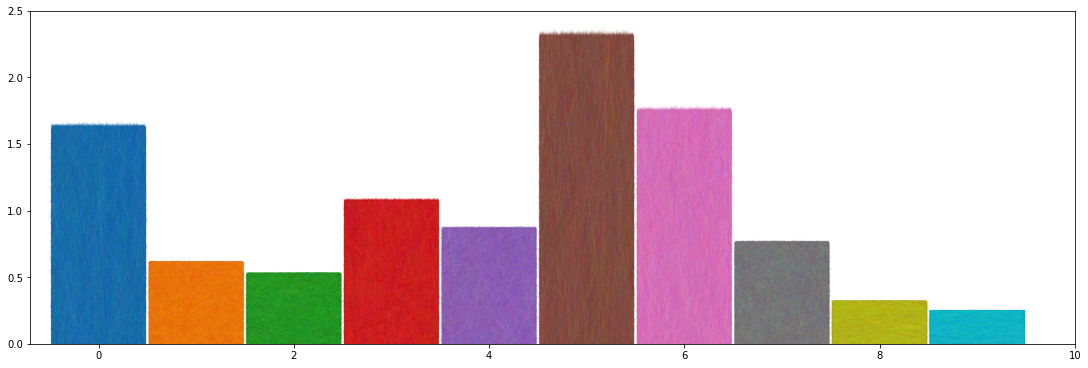

In [7]:
np.random.seed(1)

rects = 10
fig, ax = plt.subplots(figsize=(15, 5))
max_height = 0
for idx, height in enumerate(np.abs(np.random.randn(rects))):
    rect = Rectangle(center=(idx, height / 2), width=0.95, height=height)
    rect.plot(ax=ax, color=f'C{idx}', n=int((height + 4) * 10_000), alpha=0.1, fuzz=5, lw=1)
    max_height = max(max_height, height + 0.2)
ax.set_xlim(-0.7, rects)
ax.set_ylim(0, max_height)
fig.savefig(SAVEDIR / 'barchart.png')

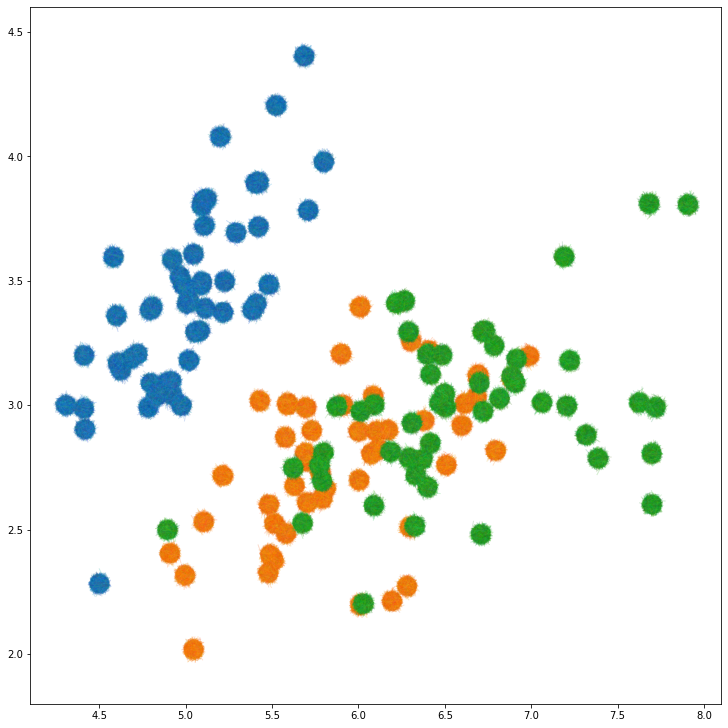

In [8]:
from sklearn.datasets import load_iris
iris = load_iris()

fig, ax = plt.subplots(figsize=(10, 10))
data = iris['data'][:, :2]

for row, target in zip(data, iris['target']):
    circ = Ellipse(center=row + 0.02 * np.random.randn(2), width=0.04, height=0.023)
    circ.plot(ax=ax, color=f"C{target}", n=4_000, alpha=0.2, fuzz=10, lw=1)
ax.set_xlim(data[:, 0].min() - 0.2, data[:, 0].max() + 0.2)
ax.set_ylim(data[:, 1].min() - 0.2, data[:, 1].max() + 0.2)
fig.savefig(SAVEDIR / 'iris.png')

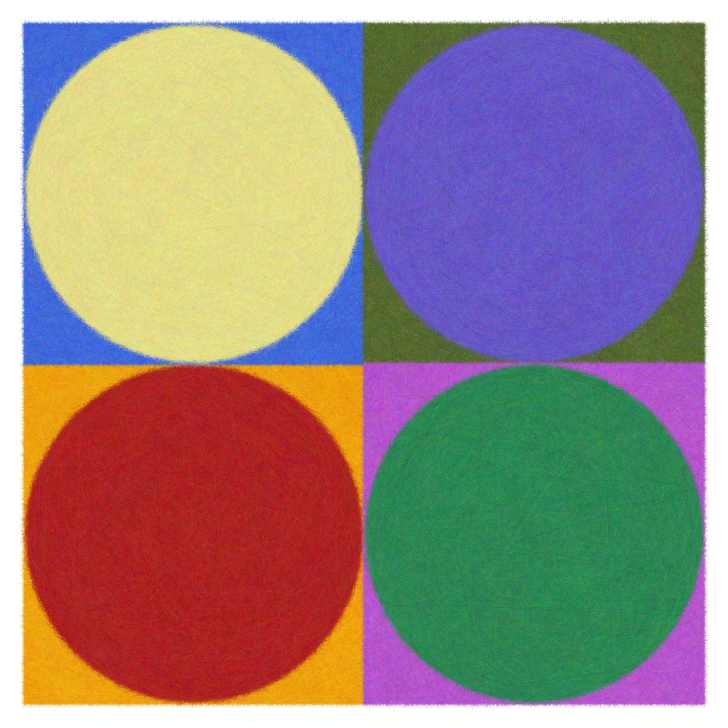

In [9]:
n = 40_000

fig, ax = plt.subplots(figsize=(10, 10))

r = 0.96
for (center, back, front) in [((-1, -1), 'orange', 'firebrick'), ((-1, 1), 'royalblue', 'khaki'), ((1, 1), 'darkolivegreen', 'slateblue'), ((1, -1), 'mediumorchid', 'seagreen')]:
    rect = Rectangle(center=center, width=2, height=2)
    rect.plot(ax=ax, color=back, n=n, alpha=1, lw=0.1)
    
    circ = Ellipse(center=center, width=r, height=r)
    circ.plot(ax=ax, color=front, n=n, lw=0.1, alpha=1, fuzz=20)

    
ax.set_xlim(-2.1, 2.1)
ax.set_ylim(-2.1, 2.1)
ax.set_axis_off()
fig.savefig(SAVEDIR / 'overlap.png')

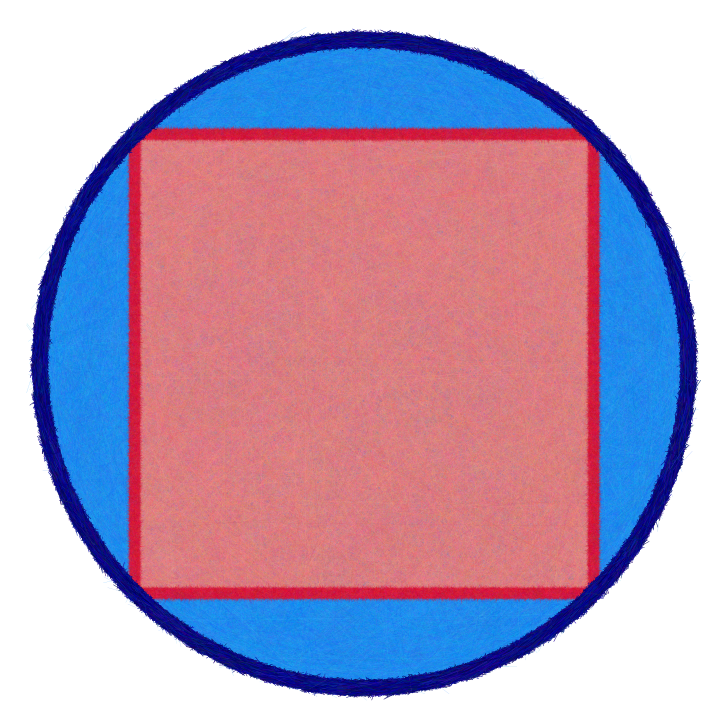

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))

t = np.linspace(-np.pi, np.pi, 50)
r = 0.97
circ = Ellipse(center=np.zeros(2), width=r, height=r)
circ.plot(ax=ax, color='dodgerblue', n=40_000, lw=0.1, alpha=1, fuzz=20)
rect = Rectangle(center=np.zeros(2), width=1.4, height=1.4)
rect.plot(ax=ax, color='lightcoral', n=40_000, alpha=1, lw=0.1)

edge = np.sqrt(2) / 2
plot_vline(ax, -edge, -edge, edge, color='crimson', lw=0.1, width=0.03, fuzz=100, n=1_000, alpha=1)
plot_vline(ax, edge, -edge, edge, color='crimson', lw=0.1, width=0.03, fuzz=100, n=1_000, alpha=1)
plot_hline(ax, -edge, -edge, edge, color='crimson', lw=0.1, width=0.03, fuzz=100, n=1_000, alpha=1)
plot_hline(ax, edge, -edge, edge, color='crimson', lw=0.1, width=0.03, fuzz=100, n=1_000, alpha=1)

plot_line(ax, np.cos(t), np.sin(t), color='navy', lw=0.5, width=0.03, n=10_000, alpha=1)

ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
ax.set_axis_off()
fig.savefig(SAVEDIR / 'inscribed.png')